From the useful sheets, we have to formalize a GRL problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests 
import io
import seaborn as sns

In [2]:
PATH = '../data/'
files = os.listdir(PATH)
dfs = {f[:-4] : pd.read_csv(PATH + f) 
           for f in files if f[-3:] == 'csv'
}

What all is useful here:
- orig_members: member_id (763)
- orig_inline_notifications: notify_from_id, notify_to_id (47066)
- orig_message_topic_user_map: map_user_id, map_topic_id (6025)
- orig_message_topics: mt_starter_id, mt_to_member_id, mt_id (3101)
- orig_reputation_index: member_id (141550)

In [3]:
#76. 763 Original members.
sum(dfs['orig_members'].email.isnull()) # (== 0) = True
dfs['orig_members'].head(4);
mems = list(dfs['orig_members'].member_id)

In [5]:
#75. Useful. Notification Graph could give us very informative edges.
# from notify_from_id to notify_to_id based on notify_type_key
# and notify_type_key could be a nice edge feature
dfs['orig_inline_notifications'].notify_type_key.value_counts();

# wow, both are fully included
print(np.mean([m in mems for m in dfs['orig_inline_notifications'].notify_from_id]))
print(np.mean([m in mems for m in dfs['orig_inline_notifications'].notify_to_id]))

dfs['orig_inline_notifications'].head(4)

1.0
1.0


,notify_id,notify_to_id,notify_sent,notify_read,notify_title,notify_text,notify_from_id,notify_type_key,notify_url,notify_meta_app,notify_meta_area,notify_meta_id,notify_meta_key
0,333021,9679,1451057630,1,<a href='http://ironmarch.org/index.php?/user/...,Hello!\n\nBolesnik just liked a post you made!...,9267,new_likes,http://ironmarch.org/index.php?/topic/5385-ukr...,NaN,NaN,0,NaN
1,333022,6260,1451059824,1,<a href='http://ironmarch.org/index.php?/user/...,"Haggis,\n\nAberfoyle has replied to a personal...",9327,reply_private_message,http://ironmarch.org/index.php?app=members&mod...,members,pm,3903,3908661d5069ac5f339318007422057d
2,333023,9679,1451060512,1,<a href='http://ironmarch.org/index.php?/user/...,"Vinokura,\n\nRaven (http://ironmarch.org/index...",8232,followed_topics,http://ironmarch.org/index.php?/topic/5652-tru...,forums,topics,5652,c8c841e80c748e31883b1ab076e5dc45
3,333024,1,1451060542,1,<a href='http://ironmarch.org/index.php?/user/...,Hello!\n\nDer Werwolf just liked a post you ma...,6249,new_likes,http://ironmarch.org/index.php?/topic/3382-woa...,NaN,NaN,0,NaN


In [18]:
#78. Useful. But don't fully understand.
# Mapping from user_id to topic_id, might help connect users.
print(np.mean([m in mems for m in dfs['orig_message_topic_user_map'].map_user_id]))
dfs['orig_message_topic_user_map'].head(4);
# TODO:
# Check if users following the same topic are same in 
# this map and core_message_topics and orig_message_topics

0.9966804979253112


In [78]:
# reference with topic_title and compare the topic_id v topic_title mapping of both
# orig and core
ids = 0
for i in range(len(dfs['orig_message_topics'].mt_title)):
    if dfs['orig_message_topics'].mt_title[i] == dfs['core_message_topics'].mt_title[i]:
        ids += 1
print(ids)

1160


In [79]:
len(dfs['orig_message_topics'].mt_title), len(dfs['core_message_topics'].mt_title)

(3101, 4475)

In [20]:
#79 All Orig Message Topics (total 3101)
# mt_id is same as map_topic_id from orig_message_topic_user_map
# mt_starter_id is the member_id of the person who put the first message on that topic
# mt_to_member_id is the member_id of the recipient of this message

tops = list(dfs['orig_message_topics'].mt_id)
print(np.mean([m in mems for m in dfs['orig_message_topics'].mt_starter_id]))
print(np.mean([m in mems for m in dfs['orig_message_topics'].mt_to_member_id]))
print(np.mean([m in tops for m in dfs['orig_message_topic_user_map'].map_topic_id]))

dfs['orig_message_topics'].head(5);

0.9596904224443727
0.9616252821670429
1.0


In [15]:
#82. pfields of 764 members. Might help in node features. Not really, mostly nans.
dfs['orig_pfields_content'].head(3);

In [22]:
# What is reputation? Total 141550
# 635 users have a reputation index, could be used for node classification or features?
members = set(dfs['orig_reputation_index'].member_id)

print(np.mean([m in mems for m in members]))
      
# print(members)
freq = [[m, sum(dfs['orig_reputation_index'].member_id == m)]
       for m in members]
# dfs['orig_reputation_index'].head(3)
freq_sort = sorted(freq, key = lambda z: z[1], reverse=True)

0.9984251968503937


In [49]:
freq_sorted = pd.DataFrame(freq_sort)

In [61]:
i = 0
while freq_sorted[1][i] > 30:
    i += 1
print(i)
print(len(freq_sorted[1]) - i)

321
314


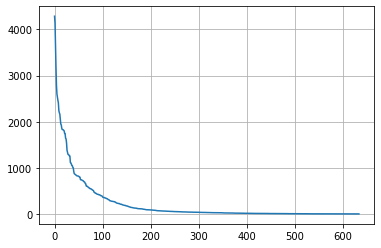

In [53]:
plt.plot(freq_sorted[1])
plt.grid()